<a href="https://colab.research.google.com/github/gsofianidou/Random_Forest/blob/main/CyberThreatHunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [61]:
# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [62]:
# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

In [63]:
# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

In [64]:
# εμφάνιση των στηλών του dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [66]:
# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
x = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = data['Class']

In [67]:
# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-68-8ec7e6cbe4d7>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Class
0    284315
1       492
Name: count, dtype: int64

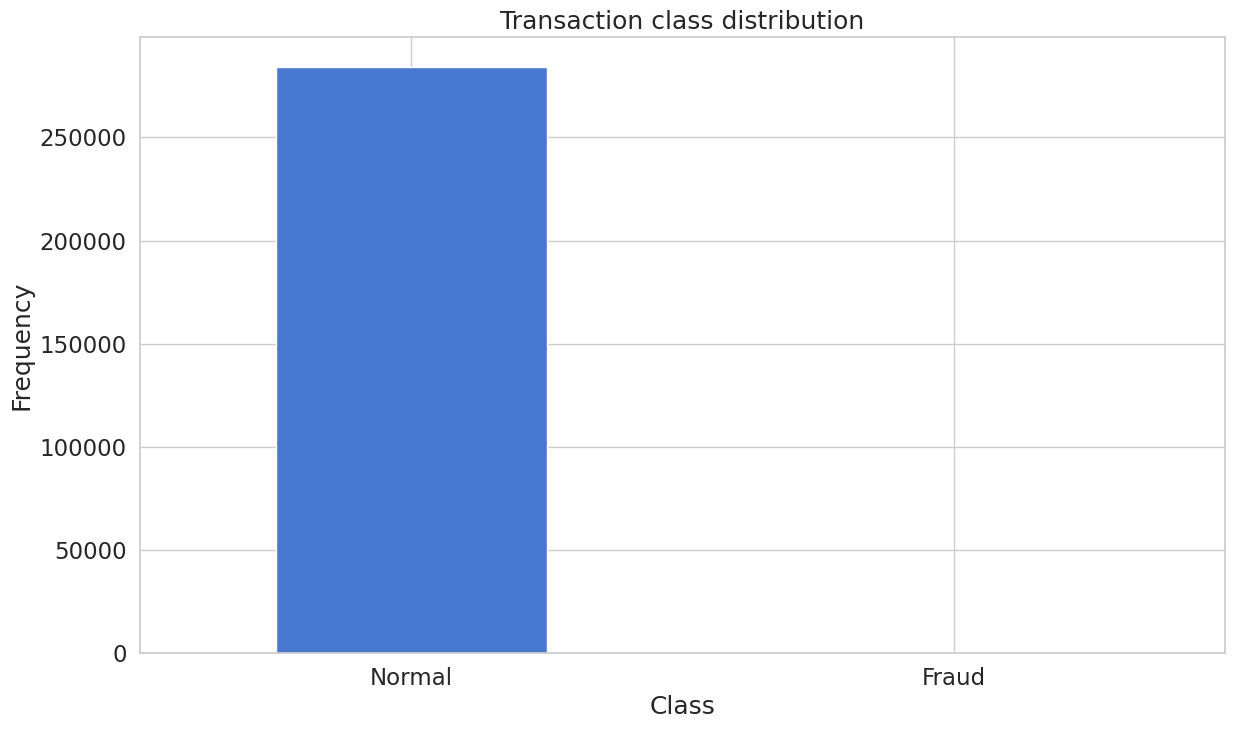

In [68]:
# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");
data['Class'].value_counts()

In [56]:
# δημιουργία Random Forest αλγορίθμου
rf = RandomForestClassifier(random_state=42)

In [57]:
# εκπαίδευση αλγόριθμου
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# πρόβλεψη συνόλου δοκιμής
y_rf = rf.predict(x_test)

Accuracy:
 0.9995611109160493
Precision:
 0.974025974025974
Recall:
 0.7653061224489796
Recall:
 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



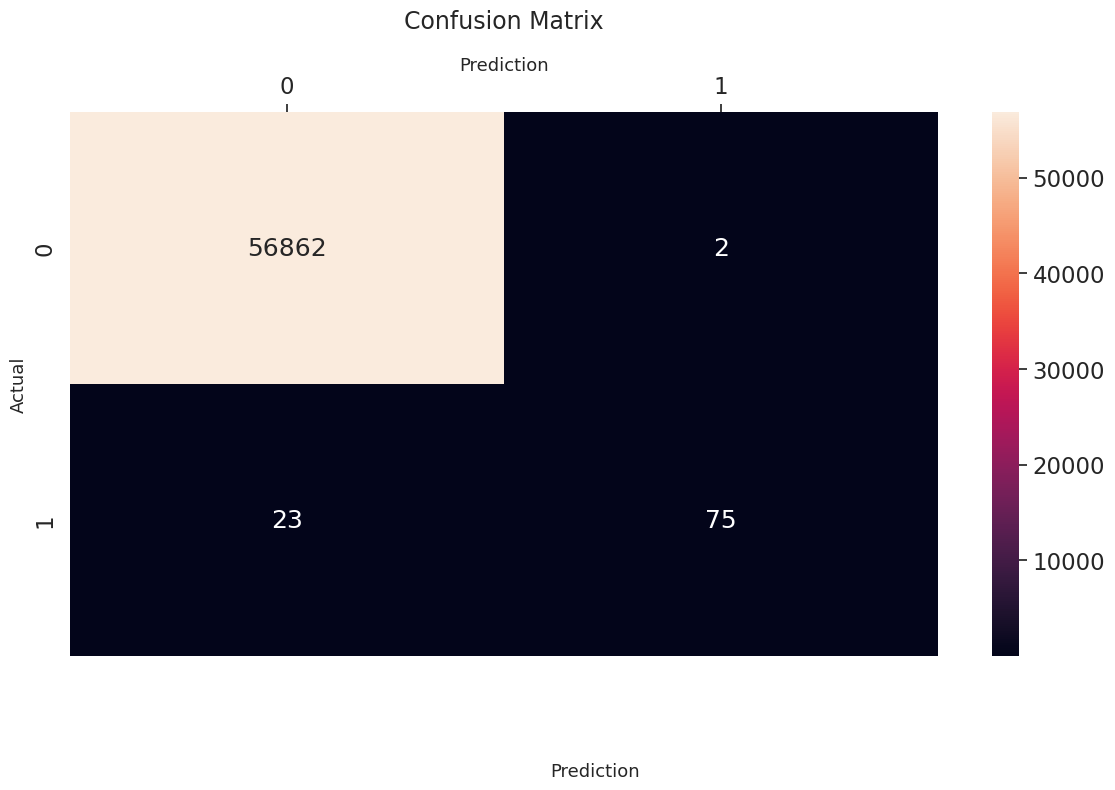

In [77]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
print("Accuracy:\n", metrics.accuracy_score(y_test, y_rf))
print("Precision:\n",metrics.precision_score(y_test, y_rf))
print("Recall:\n",metrics.recall_score(y_test, y_rf))
print("Recall:\n",metrics.f1_score(y_test, y_rf))
print(classification_report(y_test, y_rf))
cm = metrics.confusion_matrix(y_test, y_rf)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()